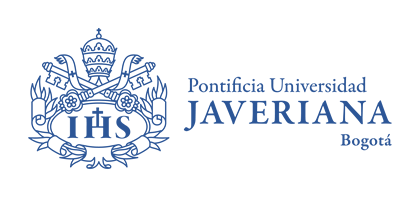

# Gestión de Datos - Taller 1
- Juan Sebastián Vargas Torres

### Contexto 

Muchos gobiernos alrededor del mundo han promovido la iniciativa de datos abiertos
como un mecanismo de transparencia que habilita a cualquier ciudadano tener acceso
a datos de dominio público. De esta forma, los ciudadanos pueden participar en la
creación de políticas públicas, hacer seguimiento al gasto público y en general tener
visibilidad de variados aspectos de índole público.
Colombia no es la excepción. En el portal de datos abiertos datos.gov.co los
ciudadanos pueden acceder a datos oficiales y no oficiales de diferentes categorías,
entidades y zonas del país. Adicionalmente, también pueden aportar a la comunidad
subiendo nuevos datos o análisis sobre datos ya existentes. Al día de hoy existen casi
6 mil conjuntos de datos, más de 20 mil visualizaciones y 935 entidades.

### Imports

In [1854]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylev

### Funciones Útiles

In [1855]:
def replace_ct(municipio):
  return municipio.str.replace(" \(CT\)","")

In [1856]:
def  getLimitsAndMedian(attribute):

  # Cuartil 1
  q1 = attribute.quantile(0.25)
 
  # Cuartil 3
  q3 = attribute.quantile(0.75)

  med = attribute.median()
  
  # IQR
  iqr = q3-q1
  
  upper_bound = q3+(2.5*iqr)
  lower_bound = q1-(2.5*iqr)

  print("Q1: ",q1," Q3: ", q3," Median: ", med," IQR: ", iqr)
  return upper_bound, lower_bound, med

### Dataframes

#### Delitos sexuales

In [1857]:
delitos_sexuales_df_cpy= pd.read_csv("https://github.com/Sebas102507/taller1_gestion_de_datos/blob/main/Reporte__Delitos_sexuales_Polic_a_Nacional.csv?raw=true")

In [1858]:
delitos_sexuales_df= delitos_sexuales_df_cpy.copy()

In [1859]:
delitos_sexuales_df.head(20)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,delito
0,CAQUETÁ,SOLANO,18756000.0,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,MENORES,1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS
1,BOLÍVAR,CARTAGENA (CT),13001000.0,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADOLECENTES,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
2,HUILA,LA PLATA,41396000.0,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
3,SANTANDER,PIEDECUESTA,68547000.0,CONTUNDENTES,1/01/2010,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
4,META,VILLAVICENCIO (CT),50001000.0,CONTUNDENTES,1/01/2010,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
5,BOLÍVAR,CARTAGENA (CT),13001000.0,CONTUNDENTES,1/01/2010,FEMENINO,ADOLECENTES,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
6,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000.0,CONTUNDENTES,1/01/2010,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
7,BOYACÁ,PAYA,15533000.0,CONTUNDENTES,1/01/2010,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
8,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000.0,CONTUNDENTES,1/01/2010,MASCULINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
9,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000.0,CONTUNDENTES,1/01/2010,FEMENINO,ADULTOS,1,ARTÍCULO 206. ACTO SEXUAL VIOLENTO


In [1860]:
delitos_sexuales_df.shape

(260323, 9)

##### Exploración

In [1861]:
delitos_sexuales_df.columns

Index(['DEPARTAMENTO', 'MUNICIPIO', 'CODIGO DANE', 'ARMAS MEDIOS',
       'FECHA HECHO', 'GENERO', 'GRUPO ETARIO', 'CANTIDAD', 'delito'],
      dtype='object')

In [1862]:
delitos_sexuales_df.dtypes

DEPARTAMENTO     object
MUNICIPIO        object
CODIGO DANE     float64
ARMAS MEDIOS     object
FECHA HECHO      object
GENERO           object
GRUPO ETARIO     object
CANTIDAD          int64
delito           object
dtype: object

In [1863]:
columns= delitos_sexuales_df.columns
for c in columns:
  print("--------------------------COLUMN: ",c,"----------------------------\n\n")
  print(delitos_sexuales_df[c].unique())
  print(delitos_sexuales_df[c].value_counts())
  print("---------------------------------------------------------\n\n\n")

--------------------------COLUMN:  DEPARTAMENTO ----------------------------


['CAQUETÁ' 'BOLÍVAR' 'HUILA' 'SANTANDER' 'META' 'CUNDINAMARCA' 'BOYACÁ'
 'VALLE' 'GUAJIRA' 'SUCRE' 'CASANARE' 'RISARALDA' 'ARAUCA' 'CÓRDOBA'
 'CHOCÓ' 'VICHADA' 'TOLIMA' 'CALDAS' 'PUTUMAYO' 'ATLÁNTICO' 'ANTIOQUIA'
 'CAUCA' 'QUINDÍO' 'NORTE DE SANTANDER' 'AMAZONAS' 'MAGDALENA' 'CESAR'
 'NARIÑO' 'GUAVIARE' 'SAN ANDRÉS' 'VAUPÉS' 'GUAINÍA']
CUNDINAMARCA          48241
ANTIOQUIA             30509
VALLE                 26996
SANTANDER             17655
ATLÁNTICO             11885
HUILA                 10667
TOLIMA                 9400
BOLÍVAR                8943
BOYACÁ                 8275
META                   8157
RISARALDA              7707
NARIÑO                 7115
CÓRDOBA                6874
CAUCA                  6826
NORTE DE SANTANDER     6300
CALDAS                 6257
MAGDALENA              6024
CESAR                  5119
SUCRE                  4783
CAQUETÁ                3693
QUINDÍO                

In [1864]:
delitos_sexuales_df.isna().sum()

DEPARTAMENTO      0
MUNICIPIO         1
CODIGO DANE       1
ARMAS MEDIOS      0
FECHA HECHO       0
GENERO          304
GRUPO ETARIO    537
CANTIDAD          0
delito            0
dtype: int64

##### Limpieza Columnas

###### Departamento

Esta columna no requiere de limpieza debido a que no hay valores nulos o incosistentes.

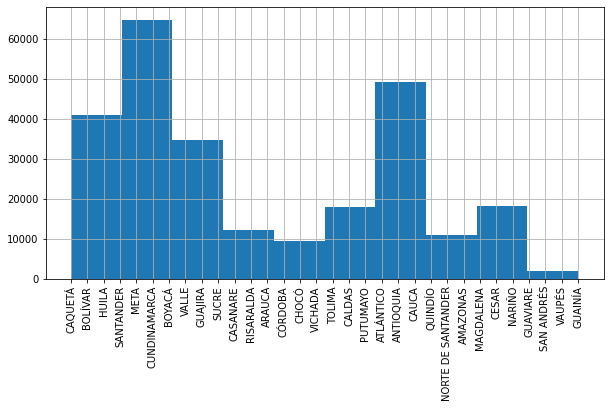

In [1865]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
delitos_sexuales_df["DEPARTAMENTO"].hist()

###### Municipio

Existen valores nulos, los cuales serán eliminados.
La capitales tienen un texto adicional: (CT), el cual puede interferir para la visualización, por lo cual se eliminó.

In [1866]:
delitos_sexuales_df.dropna(subset=['MUNICIPIO'], inplace=True)

In [1867]:
delitos_sexuales_df['MUNICIPIO'].unique()

array(['SOLANO', 'CARTAGENA (CT)', 'LA PLATA', ..., 'JURADÓ', 'GONZÁLEZ',
       'JORDÁN'], dtype=object)

In [1868]:
delitos_sexuales_df['MUNICIPIO']=replace_ct(delitos_sexuales_df['MUNICIPIO'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [1869]:
delitos_sexuales_df["MUNICIPIO"].value_counts()

BOGOTÁ D.C.     35803
CALI            14026
MEDELLÍN        13862
BARRANQUILLA     6448
BUCARAMANGA      5170
                ...  
GRAMALOTE           4
GUACAMAYAS          4
SÁCAMA              4
RECETOR             3
JORDÁN              1
Name: MUNICIPIO, Length: 1019, dtype: int64

###### Codigo DANE

Se tiene el error de que se pandas lo considera numérico,sin embargo en categórico nominal

In [1870]:
delitos_sexuales_df["CODIGO DANE"]=delitos_sexuales_df["CODIGO DANE"].astype(str)

###### ARMAS MEDIOS

Existen valores inconsistentes, que tienen como valor :"-", estos se eliminaron ya que no son representativos en cantidad para el dataframe.

Existen valores donde el arma no fue reportada, por lo cual lo que se hizo fue asignarles el valor de : "Sin Empleo de armas"

Los valores de "CortoPunzantes", "Cortantes" y "Armas blancas" se cambiaron por el valor de "Arma Blanca/ Conrtopunzante"


In [1871]:
delitos_sexuales_df.drop( (delitos_sexuales_df[(delitos_sexuales_df["ARMAS MEDIOS"]=="-")].index), inplace=True)

In [1872]:
delitos_sexuales_df.loc[(delitos_sexuales_df["ARMAS MEDIOS"]=="NO REPORTADO"),"ARMAS MEDIOS"]="SIN EMPLEO DE ARMAS"

In [1873]:
delitos_sexuales_df["ARMAS MEDIOS"].value_counts()

SIN EMPLEO DE ARMAS            192450
CONTUNDENTES                    45387
ARMA BLANCA / CORTOPUNZANTE     12818
ESCOPOLAMINA                     6182
ARMA DE FUEGO                    2227
LICOR ADULTERADO                  967
CORTOPUNZANTES                    107
CINTAS/CINTURON                   104
ESPOSAS                            63
CORTANTES                          14
ARMAS BLANCAS                       1
Name: ARMAS MEDIOS, dtype: int64

In [1874]:
delitos_sexuales_df.loc[(delitos_sexuales_df["ARMAS MEDIOS"]=="CORTOPUNZANTES"),"ARMAS MEDIOS"]="ARMA BLANCA / CORTOPUNZANTE"
delitos_sexuales_df.loc[(delitos_sexuales_df["ARMAS MEDIOS"]=="CORTANTES"),"ARMAS MEDIOS"]="ARMA BLANCA / CORTOPUNZANTE"
delitos_sexuales_df.loc[(delitos_sexuales_df["ARMAS MEDIOS"]=="ARMAS BLANCAS"),"ARMAS MEDIOS"]="ARMA BLANCA / CORTOPUNZANTE"

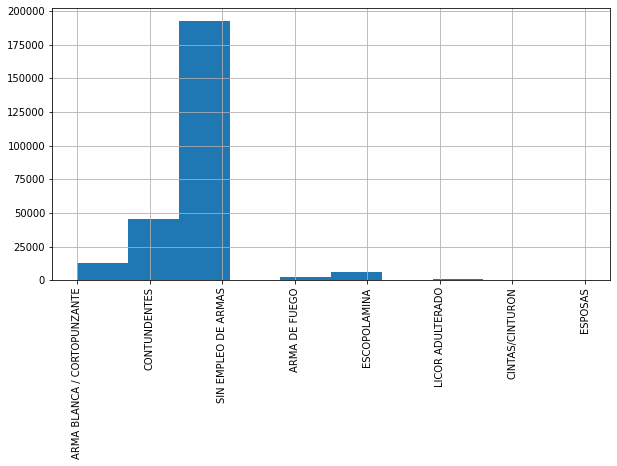

In [1875]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
delitos_sexuales_df["ARMAS MEDIOS"].hist()

###### FECHA HECHO
No estaba en formato fecha, por lo tanto se hizo el cambio al formato correcto.

In [1876]:
delitos_sexuales_df['FECHA HECHO'] = pd.to_datetime(delitos_sexuales_df['FECHA HECHO'], infer_datetime_format=True)

###### GENERO

Existen valores incosistentes, con valor de: "-", estos se eliminaron dichos registros ya que no eran significativos en cantidad para el dataframe.

Existen campos nulos, los cuales también se eliminaron.

In [1877]:
delitos_sexuales_df.drop( delitos_sexuales_df[  ((delitos_sexuales_df["GENERO"]=="-") | ((delitos_sexuales_df["GENERO"]=="NO REPORTA") | (delitos_sexuales_df["GENERO"]=="NO REPORTADO")) )].index, inplace=True)

In [1878]:
delitos_sexuales_df.dropna(subset=['GENERO'], inplace=True)

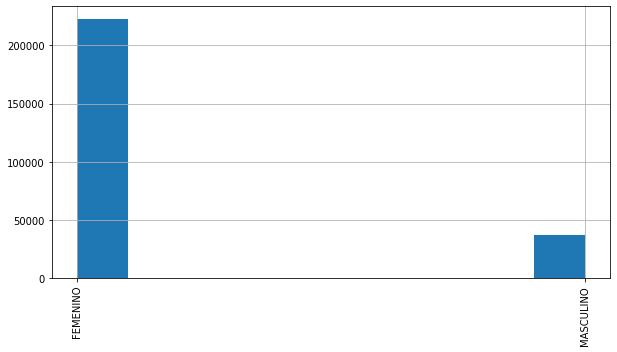

In [1879]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
delitos_sexuales_df["GENERO"].hist()

###### Delito

En este caso no existen valores incosistentes ni nulos.

In [1880]:
delitos_sexuales_df["delito"]=delitos_sexuales_df["delito"].astype(str).str[14:]
delitos_sexuales_df["delito"]=delitos_sexuales_df["delito"].str.replace(r'([A-Z])(\.)',"")
delitos_sexuales_df["delito"]=delitos_sexuales_df["delito"].str.replace(r'(\()(.*)',"")
delitos_sexuales_df["delito"]=delitos_sexuales_df["delito"].str.replace(r'(\.)(\ )',"")
delitos_sexuales_df["delito"]=delitos_sexuales_df["delito"].str.rstrip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [1881]:
delitos_sexuales_df.loc[(delitos_sexuales_df["delito"]=="CONSTREÑIMIENTO A LA PROSTITUCIÓN"),'delito']='INDUCCIÓN A LA PROSTITUCIÓN'

In [1882]:
delitos_sexuales_df["delito"].value_counts()

ACTOS SEXUALES CON MENOR DE 14 AÑOS                                                                89195
ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS                                                         58980
ACCESO CARNAL VIOLENTO                                                                             39786
ACTO SEXUAL VIOLENTO                                                                               27558
ACOSO SEXUAL                                                                                       16237
ACCESO CARNAL O ACTO SEXUAL ABUSIVO CON INCAPAZ DE RESISTIR                                        10046
PORNOGRAFÍA CON MENORES                                                                             6662
ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR                            5103
INDUCCIÓN A LA PROSTITUCIÓN                                                                         1973
UTILIZACIÓN O FACILITACIÓN DE MEDIOS DE COMUNICACIÓN PA

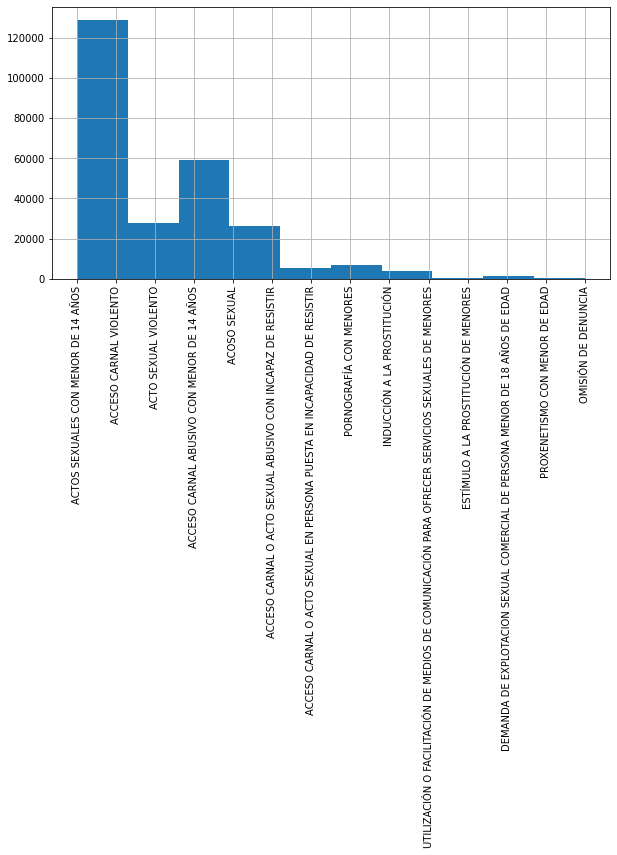

In [1883]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
delitos_sexuales_df["delito"].hist()

###### Cantidad
Esta columna se elimina ya que el 97% de los valores son iguales, por lo tanto no tiene mucho sentido dejarla.

In [1884]:
delitos_sexuales_df[ delitos_sexuales_df['CANTIDAD']==1].shape[0]/delitos_sexuales_df.shape[0]

0.9751301731785398

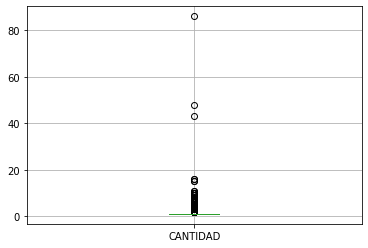

In [1885]:
delitos_sexuales_df.boxplot(column="CANTIDAD")

In [1886]:
delitos_sexuales_df=delitos_sexuales_df.drop(columns=["CANTIDAD"])

###### GRUPO ETARIO

Habían dos formas para asociar a un adolescente: Adolecentes y Adolescentes, en este caso se hizo el cambio de todos hacia el segundo caso.

Existen campos nulos, los cuales  se eliminaron.

In [1887]:
delitos_sexuales_df.loc[ (delitos_sexuales_df["GRUPO ETARIO"]=="ADOLECENTES"),"GRUPO ETARIO"]="ADOLESCENTES"

In [1888]:
delitos_sexuales_df.dropna(subset=['GRUPO ETARIO'], inplace=True)

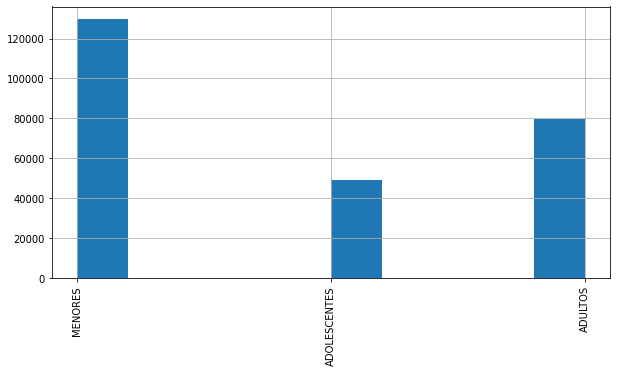

In [1889]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
delitos_sexuales_df["GRUPO ETARIO"].hist()

##### Preguntas

###### Pregunta 1
 ¿Cuáles han sido los departamentos (TOP 3) más afectados en
términos de cantidad de delitos cometidos en los últimos 5 años?

In [1890]:
# Últimos 5 años: 2022, 2021, 2020, 2019, 2018
last_five_years=[2022, 2021, 2020, 2019, 2018]
delitos_sexuales_df["FECHA HECHO"].dt.year.unique()
top3_departments= delitos_sexuales_df.loc[ (delitos_sexuales_df["FECHA HECHO"].dt.year.isin(last_five_years)) ]

In [1891]:
top3_departments["DEPARTAMENTO"].value_counts().head(3)

CUNDINAMARCA    28363
ANTIOQUIA       18832
VALLE           12429
Name: DEPARTAMENTO, dtype: int64

Los 3 departamentos más afectados por casos de violencia sexual en los últimos 5 años son: 

1) CUNDINAMARCA:    28363

2) ANTIOQUIA:       18832

3) VALLE:           12429

###### Pregunta 2
Para los casos en los que aplique, ¿cuál ha sido el arma o medio más común para cometer el delito?

In [1892]:
ignore_w=["SIN EMPLEO DE ARMAS"]
top_weapon=delitos_sexuales_df.loc[(~delitos_sexuales_df["ARMAS MEDIOS"].isin(ignore_w))]

In [1893]:
top_weapon["ARMAS MEDIOS"].value_counts()

CONTUNDENTES                   45345
ARMA BLANCA / CORTOPUNZANTE    12905
ESCOPOLAMINA                    6167
ARMA DE FUEGO                   2220
LICOR ADULTERADO                 966
CINTAS/CINTURON                  104
ESPOSAS                           63
Name: ARMAS MEDIOS, dtype: int64

Aunque en la mayoría de los casos no hubo empleo de un arma, se puede obsevar que el arma más usada fueron objetos contundentes.

###### Pregunta 3
Para los casos en los que aplique, ¿cómo ha sido la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?

In [1894]:
proportion= delitos_sexuales_df.copy()

In [1895]:
proportion=proportion[["FECHA HECHO","GRUPO ETARIO","GENERO"]]

In [1896]:
proportion["FECHA HECHO"]=proportion["FECHA HECHO"].dt.year

In [1897]:
proportion=proportion.groupby(by=["FECHA HECHO","GRUPO ETARIO","GENERO"]).size().reset_index()

In [1898]:
proportion.rename(columns={0:"Cantidad"}, inplace=True)

In [1899]:
proportion

,FECHA HECHO,GRUPO ETARIO,GENERO,Cantidad
0,2010,ADOLESCENTES,FEMENINO,1088
1,2010,ADOLESCENTES,MASCULINO,133
2,2010,ADULTOS,FEMENINO,1821
3,2010,ADULTOS,MASCULINO,190
4,2010,MENORES,FEMENINO,2989
...,...,...,...,...
73,2022,ADOLESCENTES,MASCULINO,300
74,2022,ADULTOS,FEMENINO,2344
75,2022,ADULTOS,MASCULINO,521
76,2022,MENORES,FEMENINO,2051


Se exportó el dataframe y se visualizó con Tableau

In [1900]:
#proportion.to_csv("proportion.csv")

![picture](https://drive.google.com/uc?export=view&id=1WBgqaB45Nff7e4ui0tfwj7SGYUXy-lu8)

![picture](https://drive.google.com/uc?export=view&id=16xnfdMqLuighKaFK3M0Cn6a7d_EdzyG0)

Se logra obsevar que el grupo etario que más delito sufre es el de menores, seguido de adultos y luego de adolescentes.


Para el grupo etario Adolescentes, logra observar una tendencia creciente del número de casos tanto para hombre como para mujeres en el periodo de 2011-2021, seguido de una tendencia decreciente en los posteriores años.

Para el grupo etario Adultos, logra observar una tendencia creciente del número de casos tanto para hombre como para mujeres en el periodo de 2011-2018, seguido de una tendencia decreciente en los posteriores años.

Para el grupo etario Menores, logra observar una tendencia creciente del número de casos tanto para hombre como para mujeres en el periodo de 2011-2019, seguido de una tendencia decreciente en los posteriores años.

En caso de no se logre obsevar las imágenes, se puede ver en el siguiente link:

https://drive.google.com/file/d/1WBgqaB45Nff7e4ui0tfwj7SGYUXy-lu8/view?usp=sharing


https://drive.google.com/file/d/16xnfdMqLuighKaFK3M0Cn6a7d_EdzyG0/view?usp=sharing

###### Pregunta 4
¿Se evidencia alguna tendencia para cometer dicho delito en algún mes particular del año?

In [1901]:
months_counts=delitos_sexuales_df.copy()

In [1902]:
months_counts["Mes delito"]=months_counts["FECHA HECHO"].dt.month
months_counts["Anno delito"]=months_counts["FECHA HECHO"].dt.year

In [1903]:
months= ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
months_counts["Mes delito"]=months_counts["Mes delito"].replace(
    {1:months[0],
     2:months[1],
     3:months[2],
     4:months[3],
     5:months[4],
     6:months[5],
     7:months[6],
     8:months[7],
     9:months[8],
     10:months[9],
     11:months[10],
     12:months[11],
     }
    )

In [1904]:
months_counts["Mes delito"].value_counts()

Enero         30732
Agosto        22262
Marzo         22178
Mayo          22045
Febrero       21531
Octubre       21476
Julio         21152
Septiembre    21130
Abril         20739
Junio         19717
Noviembre     18754
Diciembre     17019
Name: Mes delito, dtype: int64

In [1905]:
months_counts.loc[(months_counts["Mes delito"]=="Enero")].shape[0]

30732

In [1906]:
y=[ months_counts.loc[(months_counts["Mes delito"]==m)].shape[0]  for m in months]

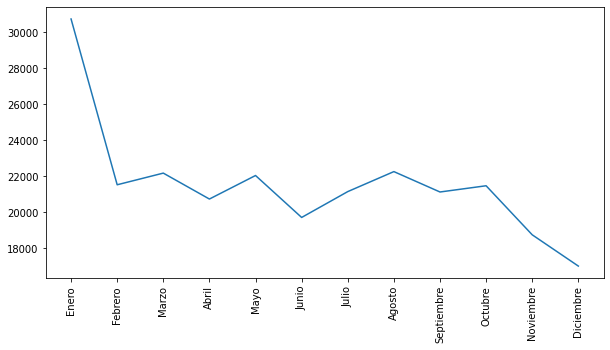

In [1907]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
plt.plot(months,y)
plt.show()

Se logra observar que existe una tendencia a que se produscan más delitos sexuales en el mes de enero.

###### Pregunta 5
Para los casos en los que se disponga del detalle del delito o de una descripción, como por ejemplo en delitos sexuales y secuestro, ¿cuáles son las descripciones o modalidades más comunes?

In [1908]:
detail_df=delitos_sexuales_df.copy()

In [1909]:
detail_df['delito'].value_counts()

ACTOS SEXUALES CON MENOR DE 14 AÑOS                                                                88996
ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS                                                         58872
ACCESO CARNAL VIOLENTO                                                                             39722
ACTO SEXUAL VIOLENTO                                                                               27516
ACOSO SEXUAL                                                                                       16168
ACCESO CARNAL O ACTO SEXUAL ABUSIVO CON INCAPAZ DE RESISTIR                                        10028
PORNOGRAFÍA CON MENORES                                                                             6651
ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR                            5096
INDUCCIÓN A LA PROSTITUCIÓN                                                                         1969
UTILIZACIÓN O FACILITACIÓN DE MEDIOS DE COMUNICACIÓN PA

In [1910]:
detail_df=detail_df.groupby(by='delito').size().reset_index()

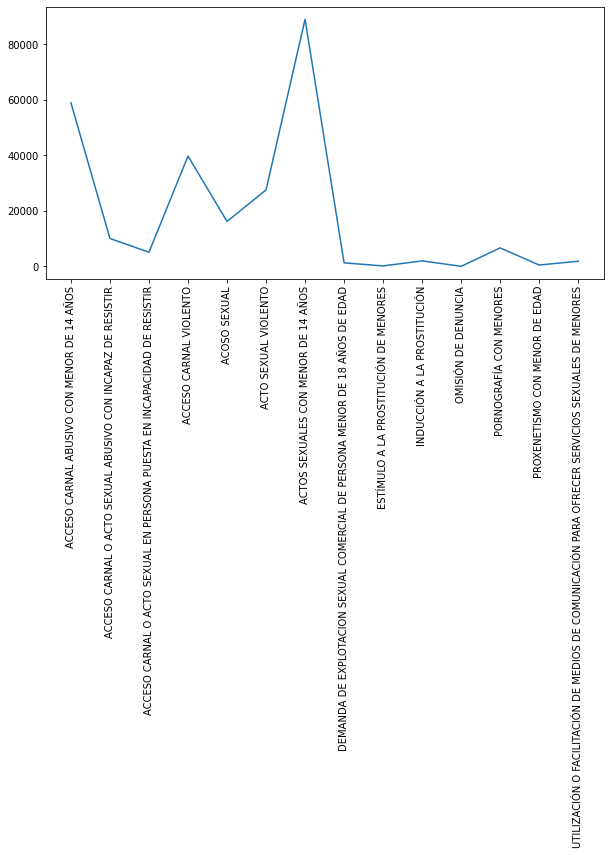

In [1911]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
plt.plot(detail_df['delito'],detail_df[0])
plt.show()

Se logra obsevar que la modalidad más frecuente respecto a los delitos sexuales, es actos sexuales con menores de 14 años.

#### Violencia Intrafamiliar

In [1912]:
violencia_intrafamiliar_df_cp= pd.read_csv("https://github.com/Sebas102507/taller1_gestion_de_datos/blob/main/Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv?raw=true")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [1913]:
violencia_intrafamiliar_df=violencia_intrafamiliar_df_cp.copy()

##### Exploración

In [1914]:
violencia_intrafamiliar_df.shape

(528880, 8)

In [1915]:
violencia_intrafamiliar_df.columns

Index(['DEPARTAMENTO', 'MUNICIPIO', 'CODIGO DANE', 'ARMAS MEDIOS',
       'FECHA HECHO', 'GENERO', 'GRUPO ETARIO', 'CANTIDAD'],
      dtype='object')

In [1916]:
violencia_intrafamiliar_df.dtypes

DEPARTAMENTO    object
MUNICIPIO       object
CODIGO DANE     object
ARMAS MEDIOS    object
FECHA HECHO     object
GENERO          object
GRUPO ETARIO    object
CANTIDAD         int64
dtype: object

In [1917]:
columns= violencia_intrafamiliar_df.columns
for c in columns:
  print("--------------------------COLUMN: ",c,"----------------------------\n\n")
  print(violencia_intrafamiliar_df[c].unique())
  print(violencia_intrafamiliar_df[c].value_counts())
  print("---------------------------------------------------------\n\n\n")

--------------------------COLUMN:  DEPARTAMENTO ----------------------------


['ATLÁNTICO' 'BOYACÁ' 'CAQUETÁ' 'CASANARE' 'CUNDINAMARCA' 'SUCRE' 'VALLE'
 'HUILA' 'ANTIOQUIA' 'ARAUCA' 'BOLÍVAR' 'CALDAS' 'CAUCA' 'CESAR' 'CHOCÓ'
 'CÓRDOBA' 'MAGDALENA' 'META' 'NARIÑO' 'NORTE DE SANTANDER' 'PUTUMAYO'
 'RISARALDA' 'SANTANDER' 'TOLIMA' 'VAUPÉS' 'GUAVIARE' 'GUAJIRA' 'QUINDÍO'
 'AMAZONAS' 'VICHADA' 'GUAINÍA' 'SAN ANDRÉS' 'NO REPORTA']
CUNDINAMARCA          96641
ANTIOQUIA             64294
VALLE                 49495
SANTANDER             41965
BOYACÁ                29623
ATLÁNTICO             19428
TOLIMA                19149
HUILA                 18528
META                  18129
BOLÍVAR               17510
NORTE DE SANTANDER    16306
NARIÑO                16073
RISARALDA             15873
CAUCA                 15748
CÓRDOBA               12200
MAGDALENA             10808
SUCRE                 10777
CALDAS                 9935
CESAR                  8535
CASANARE               6995
QUINDÍO   

In [1918]:
violencia_intrafamiliar_df.isna().sum()

DEPARTAMENTO       0
MUNICIPIO          0
CODIGO DANE        0
ARMAS MEDIOS       0
FECHA HECHO        0
GENERO             0
GRUPO ETARIO    1611
CANTIDAD           0
dtype: int64

##### Limpieza Columnas

###### Departamento

Esta columna se busca eliminar todos aquellos registros que tienen como valor: "No Reporta"

In [1919]:
violencia_intrafamiliar_df=violencia_intrafamiliar_df.drop(violencia_intrafamiliar_df[ violencia_intrafamiliar_df["DEPARTAMENTO"]=="NO REPORTA"].index)

In [1920]:
violencia_intrafamiliar_df[ violencia_intrafamiliar_df["DEPARTAMENTO"]=="NO REPORTA"]

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD


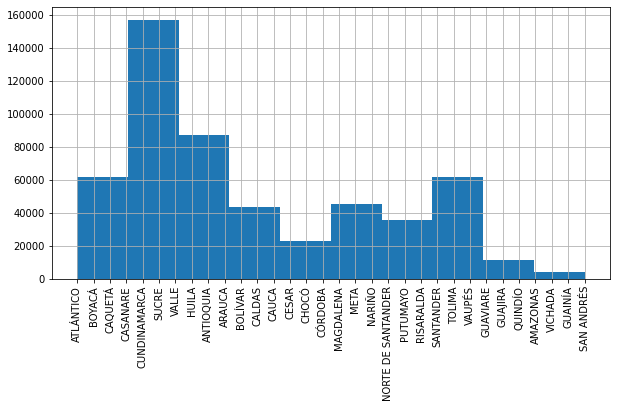

In [1921]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
violencia_intrafamiliar_df["DEPARTAMENTO"].hist()

###### Municipio

Esta columna se busca eliminar todos aquellos registros que tienen como valor: "No Reporta"

La capitales tienen un texto adicional: (CT), el cual puede interferir para la visualización, por lo cual se eliminó.

In [1922]:
violencia_intrafamiliar_df=violencia_intrafamiliar_df.drop(violencia_intrafamiliar_df[ violencia_intrafamiliar_df["MUNICIPIO"]=="NO REPORTA"].index)

In [1923]:
violencia_intrafamiliar_df[ violencia_intrafamiliar_df["MUNICIPIO"]=="NO REPORTA"]

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD


In [1924]:
violencia_intrafamiliar_df['MUNICIPIO']=replace_ct(violencia_intrafamiliar_df['MUNICIPIO'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


###### Codigo DANE

Esta columna no requiere de limpieza debido a que no hay valores nulos o incosistentes.

###### ARMAS MEDIOS

Existen valores donde el arma no fue reportada, por lo cual lo que se hizo fue asignarles el valor de : "Sin Empleo de armas".

Se eliminaron los registros con un valor de "-"


In [1925]:
violencia_intrafamiliar_df.loc[(violencia_intrafamiliar_df["ARMAS MEDIOS"]=="NO REPORTA"),"ARMAS MEDIOS"]="SIN EMPLEO DE ARMAS"
violencia_intrafamiliar_df.loc[(violencia_intrafamiliar_df["ARMAS MEDIOS"]=="NO REPORTADO"),"ARMAS MEDIOS"]="SIN EMPLEO DE ARMAS"

In [1926]:
violencia_intrafamiliar_df=violencia_intrafamiliar_df.drop(violencia_intrafamiliar_df[ violencia_intrafamiliar_df["ARMAS MEDIOS"]=="-"].index)

In [1927]:
violencia_intrafamiliar_df.loc[(violencia_intrafamiliar_df["ARMAS MEDIOS"]=="CORTOPUNZANTES"),"ARMAS MEDIOS"]="ARMA BLANCA / CORTOPUNZANTE"
violencia_intrafamiliar_df.loc[(violencia_intrafamiliar_df["ARMAS MEDIOS"]=="CORTANTES"),"ARMAS MEDIOS"]="ARMA BLANCA / CORTOPUNZANTE"
violencia_intrafamiliar_df.loc[(violencia_intrafamiliar_df["ARMAS MEDIOS"]=="PUNZANTES"),"ARMAS MEDIOS"]="ARMA BLANCA / CORTOPUNZANTE"

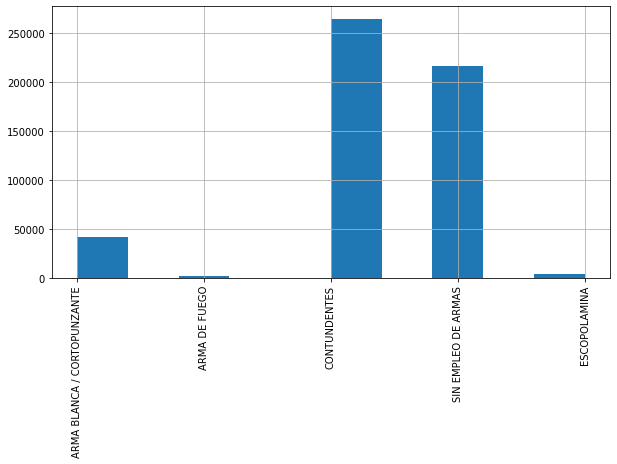

In [1928]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
violencia_intrafamiliar_df["ARMAS MEDIOS"].hist()

###### FECHA HECHO
No estaba en formato fecha, por lo tanto se hizo el cambio al formato correcto.

In [1929]:
violencia_intrafamiliar_df['FECHA HECHO'] = pd.to_datetime(violencia_intrafamiliar_df['FECHA HECHO'], infer_datetime_format=True)

###### GENERO

Existen valores incosistentes, con valor de: "-", estos se eliminaron dichos registros ya que no eran significativos en cantidad para el dataframe.

Existen campos nulos, los cuales también se eliminaron.

In [1930]:
violencia_intrafamiliar_df.drop( violencia_intrafamiliar_df[  ((violencia_intrafamiliar_df["GENERO"]=="-") | ((violencia_intrafamiliar_df["GENERO"]=="NO REPORTA") | (violencia_intrafamiliar_df["GENERO"]=="NO REPORTADO")) )].index, inplace=True)

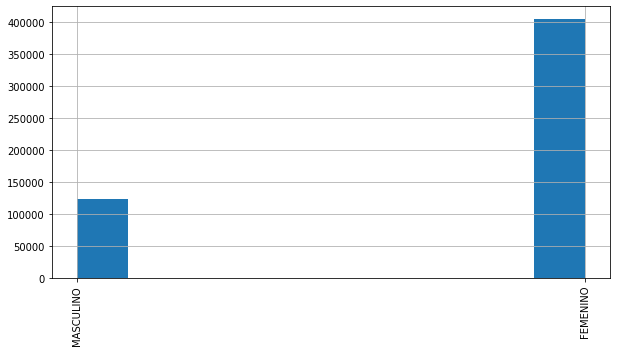

In [1931]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
violencia_intrafamiliar_df["GENERO"].hist()

###### Cantidad
Esta columna se elimina ya que el 78% de los valores son iguales, por lo tanto no tiene mucho sentido dejarla.

In [1932]:
violencia_intrafamiliar_df[ violencia_intrafamiliar_df['CANTIDAD']==1].shape[0]/violencia_intrafamiliar_df.shape[0]

0.7872610573084011

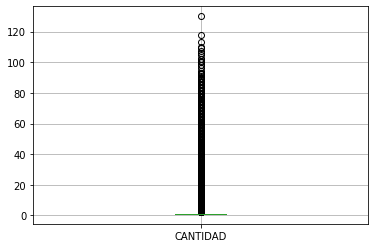

In [1933]:
violencia_intrafamiliar_df.boxplot(column="CANTIDAD")

In [1934]:
violencia_intrafamiliar_df=violencia_intrafamiliar_df.drop(columns=["CANTIDAD"])

###### GRUPO ETARIO


Existen campos nulos y marcado como no reportado, los cuales  se eliminaron.

In [1935]:
violencia_intrafamiliar_df.drop( violencia_intrafamiliar_df[ (violencia_intrafamiliar_df["GRUPO ETARIO"]=="NO REPORTADO")].index, inplace=True)

In [1936]:
violencia_intrafamiliar_df.dropna(subset=['GRUPO ETARIO'], inplace=True)

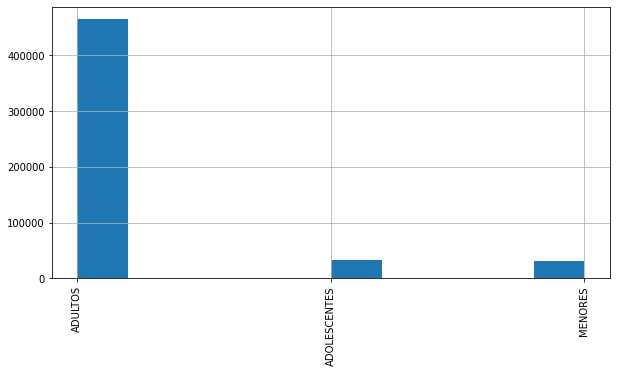

In [1937]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
violencia_intrafamiliar_df["GRUPO ETARIO"].hist()

##### Preguntas

###### Pregunta 1
 ¿Cuáles han sido los departamentos (TOP 3) más afectados en
términos de cantidad de delitos cometidos en los últimos 5 años?

In [1938]:
# Últimos 5 años: 2022, 2021, 2020, 2019, 2018
last_five_years=[2022, 2021, 2020, 2019, 2018]
violencia_intrafamiliar_df["FECHA HECHO"].dt.year.unique()
top3_departments= violencia_intrafamiliar_df.loc[ (violencia_intrafamiliar_df["FECHA HECHO"].dt.year.isin(last_five_years)) ]

In [1939]:
top3_departments["DEPARTAMENTO"].value_counts().head(3)

CUNDINAMARCA    63120
ANTIOQUIA       38114
VALLE           23103
Name: DEPARTAMENTO, dtype: int64

Los 3 departamentos más afectados por casos de violencia sexual en los últimos 5 años son: 

1) CUNDINAMARCA:    63120

2) ANTIOQUIA:       38114

3) VALLE:           23103

###### Pregunta 2
Para los casos en los que aplique, ¿cuál ha sido el arma o medio más común para cometer el delito?

In [1940]:
ignore_w=["SIN EMPLEO DE ARMAS"]
top_weapon=violencia_intrafamiliar_df.loc[(~violencia_intrafamiliar_df["ARMAS MEDIOS"].isin(ignore_w))]

In [1941]:
top_weapon["ARMAS MEDIOS"].value_counts()

CONTUNDENTES                   263793
ARMA BLANCA / CORTOPUNZANTE     42367
ESCOPOLAMINA                     3861
ARMA DE FUEGO                    2518
Name: ARMAS MEDIOS, dtype: int64

Se puede obsevar que el arma más usada fueron objetos contundentes.

###### Pregunta 3
Para los casos en los que aplique, ¿cómo ha sido la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?

In [1942]:
proportion= violencia_intrafamiliar_df.copy()

In [1943]:
proportion=proportion[["FECHA HECHO","GRUPO ETARIO","GENERO"]]

In [1944]:
proportion["FECHA HECHO"]=proportion["FECHA HECHO"].dt.year

In [1945]:
proportion=proportion.groupby(by=["FECHA HECHO","GRUPO ETARIO","GENERO"]).size().reset_index()

In [1946]:
proportion.rename(columns={0:"Cantidad"}, inplace=True)

In [1947]:
proportion

,FECHA HECHO,GRUPO ETARIO,GENERO,Cantidad
0,2010,ADOLESCENTES,FEMENINO,730
1,2010,ADOLESCENTES,MASCULINO,292
2,2010,ADULTOS,FEMENINO,10757
3,2010,ADULTOS,MASCULINO,2908
4,2010,MENORES,FEMENINO,240
...,...,...,...,...
73,2022,ADOLESCENTES,MASCULINO,482
74,2022,ADULTOS,FEMENINO,11562
75,2022,ADULTOS,MASCULINO,3881
76,2022,MENORES,FEMENINO,740


Se exportó el dataframe y se visualizó con Tableau

In [1948]:
#proportion.to_csv("proportion1_violencia_intrafamiliar.csv")

![picture](https://drive.google.com/uc?export=view&id=1KF3gOs4FSFidXERJiNoh3oaRKOdVJbaq)

Se logra obsevar que el grupo etario que más delito sufre es el de adultos, seguido de adolescentes y menores.


Para el grupo etario Adolescentes, logra observar una tendencia constante con un leve crecimiento del número de casos tanto para hombre como para mujeres.

Para el grupo etario Adultos, logra observar una tendencia creciente del número de casos tanto para hombre como para mujeres en el periodo de 2010-2020, seguido de una tendencia decreciente en los posteriores años.

Para el grupo etario Menores, logra observar una tendencia creciente del número de casos tanto para hombre como para mujeres en el periodo de 2010-2020, seguido de una tendencia decreciente en los posteriores años.

En caso de no se logre obsevar la imagen, se puede ver en el siguiente link:


https://drive.google.com/file/d/143qUQF5Hb-hh_INynHGRYpxqpgyHO6mQ/view?usp=sharing

###### Pregunta 4
¿Se evidencia alguna tendencia para cometer dicho delito en algún mes particular del año?

In [1949]:
months_counts=violencia_intrafamiliar_df.copy()

In [1950]:
months_counts["Mes delito"]=months_counts["FECHA HECHO"].dt.month
months_counts["Anno delito"]=months_counts["FECHA HECHO"].dt.year

In [1951]:
months= ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
months_counts["Mes delito"]=months_counts["Mes delito"].replace(
    {1:months[0],
     2:months[1],
     3:months[2],
     4:months[3],
     5:months[4],
     6:months[5],
     7:months[6],
     8:months[7],
     9:months[8],
     10:months[9],
     11:months[10],
     12:months[11],
     }
    )

In [1952]:
months_counts["Mes delito"].value_counts()

Enero         53071
Febrero       46827
Marzo         46248
Mayo          45575
Abril         44421
Agosto        44389
Septiembre    43322
Julio         43253
Octubre       42271
Junio         41940
Noviembre     39462
Diciembre     36090
Name: Mes delito, dtype: int64

In [1953]:
months_counts.loc[(months_counts["Mes delito"]=="Enero")].shape[0]

53071

In [1954]:
y=[ months_counts.loc[(months_counts["Mes delito"]==m)].shape[0]  for m in months]

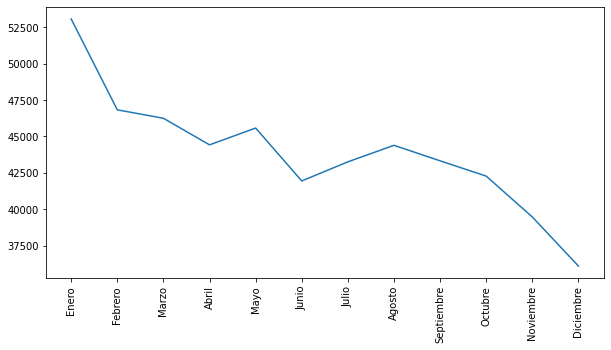

In [1955]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
plt.plot(months,y)
plt.show()

Se logra observar que existe una tendencia a que se produscan más delitos de violencia intrafamiliar en el mes de enero.

###### Pregunta 5
Para los casos en los que se disponga del detalle del delito o de una descripción, como por ejemplo en delitos sexuales y secuestro, ¿cuáles son las descripciones o modalidades más comunes?

NA

#### Secuestro

In [1956]:
secuestro_df_cp= pd.read_csv("https://github.com/Sebas102507/taller1_gestion_de_datos/blob/main/SECUESTRO.csv?raw=true")

In [1957]:
secuestro_df=secuestro_df_cp.copy()

##### Exploración

In [1958]:
secuestro_df.shape

(18642, 7)

In [1959]:
secuestro_df.head(20)

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,TIPO DELITO,CANTIDAD
0,01/01/1996 12:00:00 AM,5,ANTIOQUIA,5042,SANTAFE DE ANTIOQUIA,SECUESTRO SIMPLE,1
1,01/01/1996 12:00:00 AM,25,CUNDINAMARCA,25290,FUSAGASUGA,SECUESTRO EXTORSIVO,1
2,01/02/1996 12:00:00 AM,5,ANTIOQUIA,5038,ANGOSTURA,SECUESTRO EXTORSIVO,1
3,01/02/1996 12:00:00 AM,5,ANTIOQUIA,5088,BELLO,SECUESTRO EXTORSIVO,1
4,01/02/1996 12:00:00 AM,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",SECUESTRO EXTORSIVO,1
5,01/02/1996 12:00:00 AM,68,SANTANDER,68001,BUCARAMANGA,SECUESTRO EXTORSIVO,1
6,01/03/1996 12:00:00 AM,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",SECUESTRO EXTORSIVO,1
7,01/04/1996 12:00:00 AM,5,ANTIOQUIA,5042,SANTAFE DE ANTIOQUIA,SECUESTRO EXTORSIVO,1
8,01/04/1996 12:00:00 AM,18,CAQUETÁ,18592,PUERTO RICO,SECUESTRO EXTORSIVO,1
9,01/04/1996 12:00:00 AM,63,QUINDÍO,63001,ARMENIA,SECUESTRO EXTORSIVO,1


In [1960]:
#secuestro_df.loc[ ((secuestro_df["DEPARTAMENTO"]=="BOLÍVAR") & (secuestro_df["MUNICIPIO"]=="CARTAGENA") & (secuestro_df["FECHA HECHO"].dt.year>2017) ) ]

In [1961]:
secuestro_df.columns

Index(['FECHA HECHO', 'COD_DEPTO', 'DEPARTAMENTO', 'COD_MUNI', 'MUNICIPIO',
       'TIPO DELITO', 'CANTIDAD'],
      dtype='object')

In [1962]:
secuestro_df.dtypes

FECHA HECHO     object
COD_DEPTO        int64
DEPARTAMENTO    object
COD_MUNI         int64
MUNICIPIO       object
TIPO DELITO     object
CANTIDAD         int64
dtype: object

In [1963]:
columns= secuestro_df.columns
for c in columns:
  print("--------------------------COLUMN: ",c,"----------------------------\n\n")
  print(secuestro_df[c].unique())
  print(secuestro_df[c].value_counts())
  print("---------------------------------------------------------\n\n\n")

--------------------------COLUMN:  FECHA HECHO ----------------------------


['01/01/1996 12:00:00 AM' '01/02/1996 12:00:00 AM'
 '01/03/1996 12:00:00 AM' ... '05/15/2022 12:00:00 AM'
 '05/19/2022 12:00:00 AM' '05/27/2022 12:00:00 AM']
07/01/2000 12:00:00 AM    19
09/24/2000 12:00:00 AM    18
03/04/2000 12:00:00 AM    18
11/01/2000 12:00:00 AM    16
05/05/2000 12:00:00 AM    16
                          ..
06/18/2010 12:00:00 AM     1
06/19/2010 12:00:00 AM     1
06/22/2010 12:00:00 AM     1
06/24/2010 12:00:00 AM     1
05/27/2022 12:00:00 AM     1
Name: FECHA HECHO, Length: 6098, dtype: int64
---------------------------------------------------------



--------------------------COLUMN:  COD_DEPTO ----------------------------


[ 5 25 11 68 18 63 44 41 81  8 15 20 54 47 70 50 85 19 86 13 73 52 66 27
 76 95 23 17 91 94 99 97 88]
5     3139
76    1288
11    1227
20    1106
68    1034
50    1009
25     982
54     854
73     841
19     710
47     658
13     635
41     536
85     525
52    

In [1964]:
secuestro_df.isna().sum()

FECHA HECHO     0
COD_DEPTO       0
DEPARTAMENTO    0
COD_MUNI        0
MUNICIPIO       0
TIPO DELITO     0
CANTIDAD        0
dtype: int64

##### Limpieza Columnas

###### Departamento

Esta columna no requiere de limpieza debido a que no hay valores nulos o incosistentes.

Sin embargo se tuvo que realizar una serie de remplazos para poder hacer el join para el punto 4.

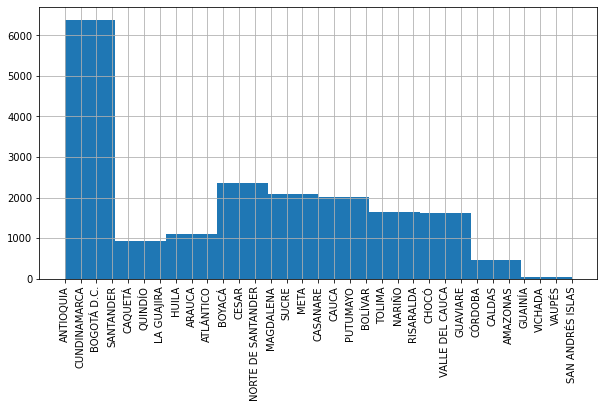

In [1965]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
secuestro_df["DEPARTAMENTO"].hist()

In [1966]:
secuestro_df["DEPARTAMENTO"]=secuestro_df["DEPARTAMENTO"].replace({"BOGOTÁ D.C.":"CUNDINAMARCA","VALLE DEL CAUCA":"VALLE"})

###### Cod_Dept

Esta columna no requiere de limpieza debido a que no hay valores nulos o incosistentes.

Adicionalmente, se eliminó debido a que representa lo mismo que la columna Departamento.

In [1967]:
secuestro_df=secuestro_df.drop(columns=["COD_DEPTO"])

###### Cod_Muni

Esta columna no requiere de limpieza debido a que no hay valores nulos o incosistentes.

Adicionalmente, se eliminó debido a que representa lo mismo que la columna Municipio.

In [1968]:
secuestro_df=secuestro_df.drop(columns=["COD_MUNI"])

###### Municipio

Esta columna no requiere de limpieza debido a que no hay valores nulos o incosistentes.

In [1969]:
secuestro_df["MUNICIPIO"]=secuestro_df["MUNICIPIO"].replace({"BOGOTA, D.C.":"BOGOTÁ D.C.","MEDELLIN":"MEDELLÍN"})

###### TIPO DELITO

Esta columna no requiere de limpieza debido a que no hay valores nulos o incosistentes.

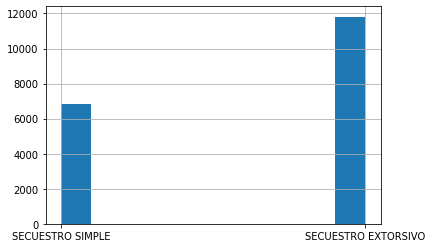

In [1970]:
secuestro_df['TIPO DELITO'].hist()

###### FECHA HECHO
No estaba en formato fecha, por lo tanto se hizo el cambio al formato correcto.

In [1971]:
secuestro_df['FECHA HECHO'] = pd.to_datetime(secuestro_df['FECHA HECHO'], infer_datetime_format=True)

###### Cantidad
Esta columna se elimina ya que el 79% de los valores son iguales, por lo tanto no tiene mucho sentido dejarla.

In [1972]:
secuestro_df[ secuestro_df['CANTIDAD']==1].shape[0]/secuestro_df.shape[0]

0.7979294067160176

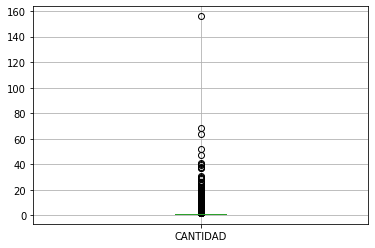

In [1973]:
secuestro_df.boxplot(column="CANTIDAD")

In [1974]:
secuestro_df=secuestro_df.drop(columns=["CANTIDAD"])

##### Preguntas

###### Pregunta 1
 ¿Cuáles han sido los departamentos (TOP 3) más afectados en
términos de cantidad de delitos cometidos en los últimos 5 años?

In [1975]:
# Últimos 5 años: 2022, 2021, 2020, 2019, 2018
last_five_years=[2022, 2021, 2020, 2019, 2018]
secuestro_df["FECHA HECHO"].dt.year.unique()
top3_departments= secuestro_df.loc[ (secuestro_df["FECHA HECHO"].dt.year.isin(last_five_years)) ]

In [1976]:
top3_departments["DEPARTAMENTO"].value_counts().head(3)

VALLE           71
ANTIOQUIA       71
CUNDINAMARCA    63
Name: DEPARTAMENTO, dtype: int64

Los 3 departamentos más afectados por casos de violencia sexual en los últimos 5 años son: 

1) ANTIOQUIA:    71

2) VALLE DEL CAUCA : 71

3) NORTE DE SANTANDER:  57

###### Pregunta 2
Para los casos en los que aplique, ¿cuál ha sido el arma o medio más común para cometer el delito?

NA

###### Pregunta 3
Para los casos en los que aplique, ¿cómo ha sido la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?

NA

###### Pregunta 4
¿Se evidencia alguna tendencia para cometer dicho delito en algún mes particular del año?

In [1977]:
months_counts=secuestro_df.copy()

In [1978]:
months_counts["Mes delito"]=months_counts["FECHA HECHO"].dt.month
months_counts["Anno delito"]=months_counts["FECHA HECHO"].dt.year

In [1979]:
months= ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
months_counts["Mes delito"]=months_counts["Mes delito"].replace(
    {1:months[0],
     2:months[1],
     3:months[2],
     4:months[3],
     5:months[4],
     6:months[5],
     7:months[6],
     8:months[7],
     9:months[8],
     10:months[9],
     11:months[10],
     12:months[11],
     }
    )

In [1980]:
months_counts["Mes delito"].value_counts()

Marzo         1732
Abril         1695
Agosto        1668
Mayo          1660
Enero         1617
Septiembre    1606
Febrero       1594
Junio         1546
Julio         1528
Octubre       1428
Noviembre     1356
Diciembre     1212
Name: Mes delito, dtype: int64

In [1981]:
months_counts.loc[(months_counts["Mes delito"]=="Enero")].shape[0]

1617

In [1982]:
y=[ months_counts.loc[(months_counts["Mes delito"]==m)].shape[0]  for m in months]

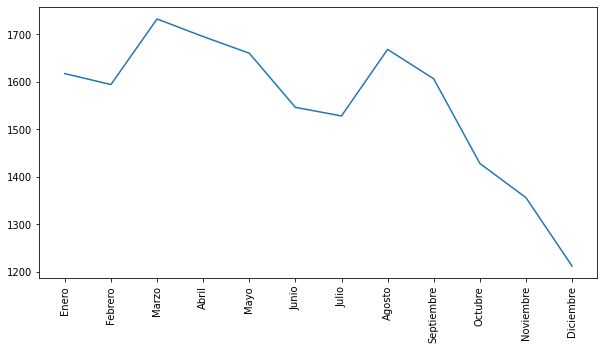

In [1983]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
plt.plot(months,y)
plt.show()

Se logra observar que existe una tendencia a que se produscan más delitos de violencia intrafamiliar en el mes de marzo.

###### Pregunta 5
Para los casos en los que se disponga del detalle del delito o de una descripción, como por ejemplo en delitos sexuales y secuestro, ¿cuáles son las descripciones o modalidades más comunes?

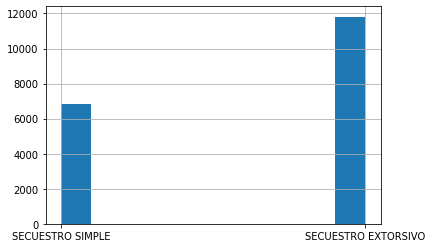

In [1984]:
secuestro_df['TIPO DELITO'].hist()

Como se puede ver, el delito más coúmn respecto a delitos de secuestro, son los secuestros extorsivos.

#### Homicidios

In [1985]:
homicidios_df_cp= pd.read_csv("https://github.com/Sebas102507/taller1_gestion_de_datos/blob/main/Homicidios_accidente_de_tr_nsito_Polic_a_Nacional.csv?raw=true")

In [1986]:
homicidios_df=homicidios_df_cp.copy()

##### Exploración

In [1987]:
homicidios_df.shape

(59810, 9)

In [1988]:
homicidios_df.columns

Index(['DEPARTAMENTO', 'MUNICIPIO', 'CODIGO DANE', 'ARMAS MEDIOS',
       'FECHA HECHO', 'GENERO', 'GRUPO ETARÍO', 'DESCRIPCIÓN CONDUCTA',
       'CANTIDAD'],
      dtype='object')

In [1989]:
homicidios_df.dtypes

DEPARTAMENTO            object
MUNICIPIO               object
CODIGO DANE              int64
ARMAS MEDIOS            object
FECHA HECHO             object
GENERO                  object
GRUPO ETARÍO            object
DESCRIPCIÓN CONDUCTA    object
CANTIDAD                 int64
dtype: object

In [1990]:
columns= homicidios_df.columns
for c in columns:
  print("--------------------------COLUMN: ",c,"----------------------------\n\n")
  print(homicidios_df[c].unique())
  print(homicidios_df[c].value_counts())
  print("---------------------------------------------------------\n\n\n")

--------------------------COLUMN:  DEPARTAMENTO ----------------------------


['ANTIOQUIA' 'ATLÁNTICO' 'CAQUETÁ' 'CASANARE' 'CESAR' 'GUAJIRA' 'HUILA'
 'NARIÑO' 'RISARALDA' 'SANTANDER' 'CÓRDOBA' 'CUNDINAMARCA' 'TOLIMA'
 'VALLE' 'MAGDALENA' 'BOYACÁ' 'CAUCA' 'NORTE DE SANTANDER' 'SUCRE' 'META'
 'QUINDÍO' 'BOLÍVAR' 'CALDAS' 'ARAUCA' 'PUTUMAYO' 'SAN ANDRÉS' 'GUAVIARE'
 'AMAZONAS' 'VICHADA' 'CHOCÓ' 'GUAINÍA' 'VAUPÉS']
CUNDINAMARCA          9026
ANTIOQUIA             7800
VALLE                 7646
SANTANDER             3076
CESAR                 2457
TOLIMA                2365
CÓRDOBA               2201
CAUCA                 2113
BOLÍVAR               2036
ATLÁNTICO             2020
NORTE DE SANTANDER    1925
HUILA                 1894
BOYACÁ                1825
NARIÑO                1731
META                  1710
MAGDALENA             1624
RISARALDA             1423
CALDAS                1177
GUAJIRA               1150
CASANARE              1008
QUINDÍO                951
SUCRE           

In [1991]:
homicidios_df.isna().sum()

DEPARTAMENTO            0
MUNICIPIO               0
CODIGO DANE             0
ARMAS MEDIOS            0
FECHA HECHO             0
GENERO                  0
GRUPO ETARÍO            0
DESCRIPCIÓN CONDUCTA    0
CANTIDAD                0
dtype: int64

##### Limpieza Columnas

###### Departamento

Esta columna no requiere de limpieza debido a que no hay valores nulos o incosistentes.

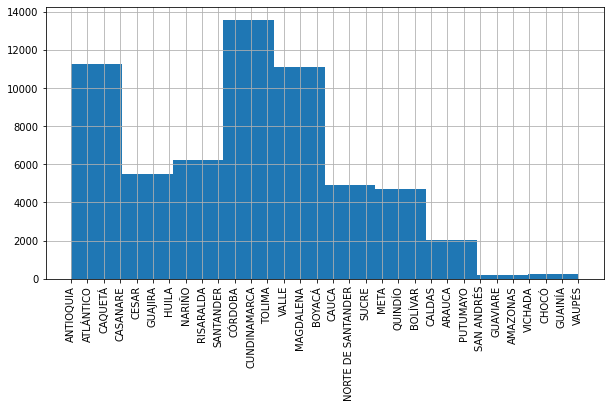

In [1992]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
homicidios_df["DEPARTAMENTO"].hist()

###### Municipio

Existen valores nulos, los cuales serán eliminados
La capitales tienen un texto adicional: (CT), el cual puede interferir para la visualización, por lo cual se eliminó y se creó una columna adicional que diga si un municipio es capital o no.

In [1993]:
homicidios_df.dropna(subset=['MUNICIPIO'], inplace=True)

In [1994]:
homicidios_df['MUNICIPIO']=replace_ct(homicidios_df['MUNICIPIO'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


###### Codigo DANE

Se tiene el error de que se pandas lo considera numérico,sin embargo en categórico nominal

In [1995]:
homicidios_df["CODIGO DANE"]=homicidios_df["CODIGO DANE"].astype(str)

###### ARMAS MEDIOS

Existen valores donde el arma no fue reportada, por lo cual lo que se hizo fue asignarles la moda

In [1996]:
homicidios_df["ARMAS MEDIOS"].mode()

0    VEHICULO
dtype: object

In [1997]:
homicidios_df.loc[(homicidios_df["ARMAS MEDIOS"]=="NO REPORTADO"),"ARMAS MEDIOS"]="VEHICULO"

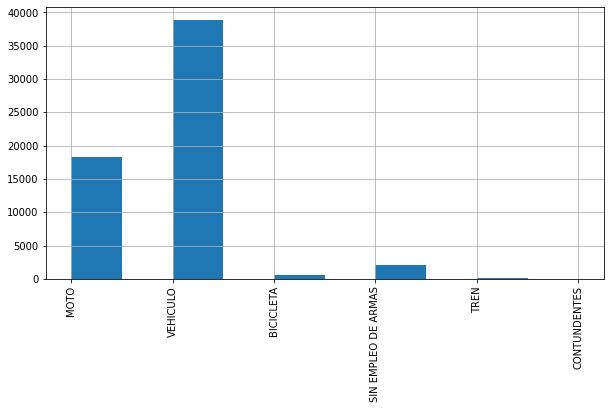

In [1998]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
homicidios_df["ARMAS MEDIOS"].hist()

###### FECHA HECHO
No estaba en formato fecha, por lo tanto se hizo el cambio al formato correcto.

In [1999]:
homicidios_df['FECHA HECHO'] = pd.to_datetime(homicidios_df['FECHA HECHO'], infer_datetime_format=True)

###### GENERO

Existen valores incosistentes, con valor de: "-", estos se eliminaron dichos registros ya que no eran significativos en cantidad para el dataframe.

Existen campos nulos, los cuales también se eliminaron.

In [2000]:
homicidios_df.drop( homicidios_df[   ((homicidios_df["GENERO"]=="NO REPORTA") | (homicidios_df["GENERO"]=="NO REPORTADO")) ].index, inplace=True)

In [2001]:
homicidios_df.dropna(subset=['GENERO'], inplace=True)

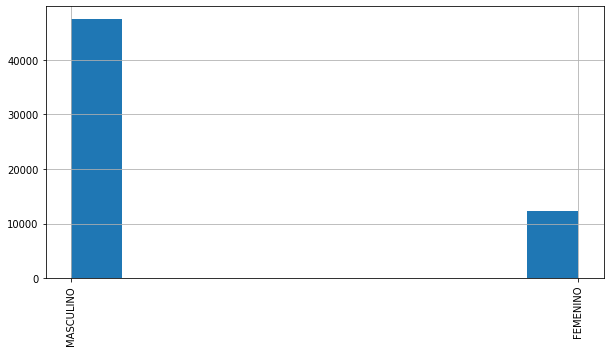

In [2002]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
homicidios_df["GENERO"].hist()

###### DESCRIPCIÓN CONDUCTA

En este caso no existen valores incosistentes ni nulos.

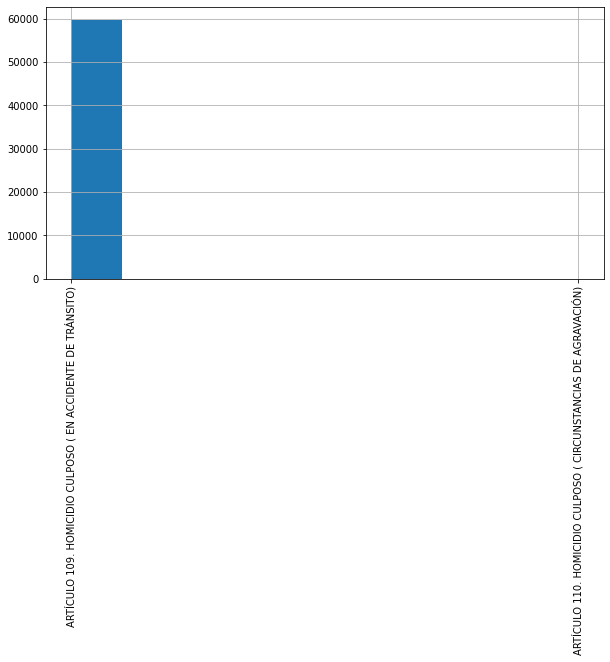

In [2003]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
homicidios_df["DESCRIPCIÓN CONDUCTA"].hist()

###### Cantidad
Esta columna se elimina ya que el 91% de los valores son iguales, por lo tanto no tiene mucho sentido dejarla.

In [2004]:
homicidios_df[ homicidios_df['CANTIDAD']==1].shape[0]/homicidios_df.shape[0]

0.918560669456067

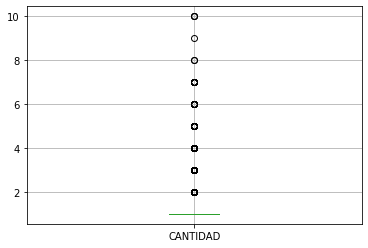

In [2005]:
homicidios_df.boxplot(column="CANTIDAD")

In [2006]:
homicidios_df=homicidios_df.drop(columns=["CANTIDAD"])

###### GRUPO ETARIO

Habían dos formas para asociar a un adolescente: Adolecentes y Adolescentes, en este caso se hizo el cambio de todos hacia el segundo caso.

Existen campos nulos, los cuales  se eliminaron.

In [2007]:
homicidios_df.loc[ (homicidios_df["GRUPO ETARÍO"]=="ADOLECENTES"),"GRUPO ETARÍO"]="ADOLESCENTES"

In [2008]:
homicidios_df=homicidios_df.drop(homicidios_df[homicidios_df["GRUPO ETARÍO"]=="NO REPORTADO"].index)

In [2009]:
homicidios_df.dropna(subset=['GRUPO ETARÍO'], inplace=True)

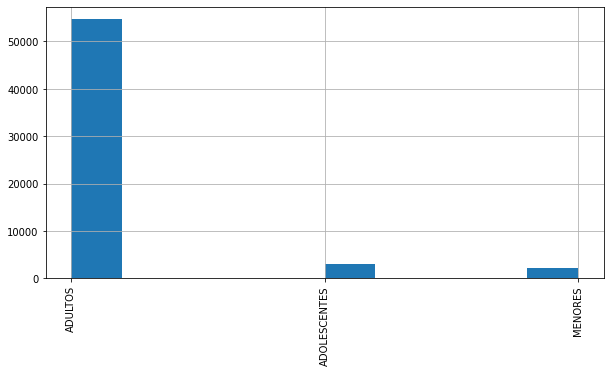

In [2010]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
homicidios_df["GRUPO ETARÍO"].hist()

##### Preguntas

###### Pregunta 1
 ¿Cuáles han sido los departamentos (TOP 3) más afectados en
términos de cantidad de delitos cometidos en los últimos 5 años?

In [2011]:
# Últimos 5 años: 2022, 2021, 2020, 2019, 2018
last_five_years=[2022, 2021, 2020, 2019, 2018]
homicidios_df["FECHA HECHO"].dt.year.unique()
top3_departments= homicidios_df.loc[ (homicidios_df["FECHA HECHO"].dt.year.isin(last_five_years)) ]

In [2012]:
top3_departments["DEPARTAMENTO"].value_counts().head(3)

CUNDINAMARCA    3387
ANTIOQUIA       3342
VALLE           2812
Name: DEPARTAMENTO, dtype: int64

Los 3 departamentos más afectados por casos de violencia sexual en los últimos 5 años son: 

1) CUNDINAMARCA:    3387

2) ANTIOQUIA:       3342

3) VALLE:           2812

###### Pregunta 2
Para los casos en los que aplique, ¿cuál ha sido el arma o medio más común para cometer el delito?

In [2013]:
ignore_w=["SIN EMPLEO DE ARMAS"]
top_weapon=homicidios_df.loc[(~homicidios_df["ARMAS MEDIOS"].isin(ignore_w))]

In [2014]:
top_weapon["ARMAS MEDIOS"].value_counts()

VEHICULO        38810
MOTO            18216
BICICLETA         551
TREN               73
CONTUNDENTES        4
Name: ARMAS MEDIOS, dtype: int64

Aunque en la mayoría de los casos no hubo empleo de un arma, se puede obsevar que el arma más usada fueron vehículos.

###### Pregunta 3
Para los casos en los que aplique, ¿cómo ha sido la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?

In [2015]:
proportion= homicidios_df.copy()

In [2016]:
proportion=proportion[["FECHA HECHO","GRUPO ETARÍO","GENERO"]]

In [2017]:
proportion["FECHA HECHO"]=proportion["FECHA HECHO"].dt.year

In [2018]:
proportion=proportion.groupby(by=["FECHA HECHO","GRUPO ETARÍO","GENERO"]).size().reset_index()

In [2019]:
proportion.rename(columns={0:"Cantidad"}, inplace=True)

In [2020]:
proportion

,FECHA HECHO,GRUPO ETARÍO,GENERO,Cantidad
0,2010,ADOLESCENTES,FEMENINO,45
1,2010,ADOLESCENTES,MASCULINO,136
2,2010,ADULTOS,FEMENINO,727
3,2010,ADULTOS,MASCULINO,2871
4,2010,MENORES,FEMENINO,86
...,...,...,...,...
73,2022,ADOLESCENTES,MASCULINO,58
74,2022,ADULTOS,FEMENINO,379
75,2022,ADULTOS,MASCULINO,1553
76,2022,MENORES,FEMENINO,23


Se exportó el dataframe y se visualizó con Tableau

In [2021]:
#proportion.to_csv("proportion_homicidios.csv")

![picture](https://drive.google.com/uc?export=view&id=143qUQF5Hb-hh_INynHGRYpxqpgyHO6mQ)

Se logra obsevar que el grupo etario que más delito sufre es el de menores, seguido de adultos y luego de adolescentes.


Para el grupo etario Adolescentes, logra observar una tendencia creciente del número de casos tanto para hombre como para mujeres en el periodo de 2011-2021, seguido de una tendencia decreciente en los posteriores años.

Para el grupo etario Adultos, logra observar una tendencia creciente del número de casos tanto para hombre como para mujeres en el periodo de 2011-2018, seguido de una tendencia decreciente en los posteriores años.

Para el grupo etario Menores, logra observar una tendencia creciente del número de casos tanto para hombre como para mujeres en el periodo de 2011-2019, seguido de una tendencia decreciente en los posteriores años.

###### Pregunta 4
¿Se evidencia alguna tendencia para cometer dicho delito en algún mes particular del año?

In [2022]:
months_counts=homicidios_df.copy()

In [2023]:
months_counts["Mes delito"]=months_counts["FECHA HECHO"].dt.month
months_counts["Anno delito"]=months_counts["FECHA HECHO"].dt.year

In [2024]:
months= ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
months_counts["Mes delito"]=months_counts["Mes delito"].replace(
    {1:months[0],
     2:months[1],
     3:months[2],
     4:months[3],
     5:months[4],
     6:months[5],
     7:months[6],
     8:months[7],
     9:months[8],
     10:months[9],
     11:months[10],
     12:months[11],
     }
    )

In [2025]:
months_counts["Mes delito"].value_counts()

Enero         5570
Diciembre     5320
Marzo         5234
Julio         4993
Octubre       4983
Agosto        4841
Abril         4836
Febrero       4820
Mayo          4804
Septiembre    4796
Noviembre     4786
Junio         4767
Name: Mes delito, dtype: int64

In [2026]:
months_counts.loc[(months_counts["Mes delito"]=="Enero")].shape[0]

5570

In [2027]:
y=[ months_counts.loc[(months_counts["Mes delito"]==m)].shape[0]  for m in months]

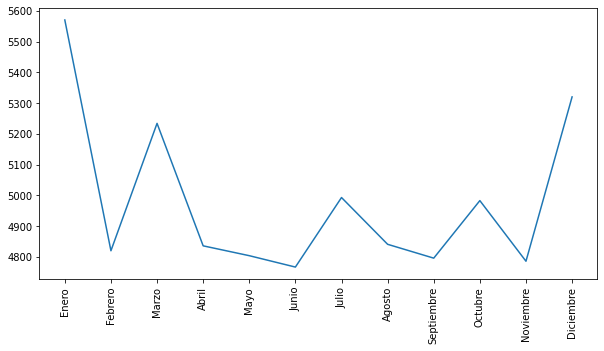

In [2028]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
plt.plot(months,y)
plt.show()

Se logra observar que existe una tendencia a que se produscan más delitos sexuales en el mes de enero.

In [2029]:
grouped_months_year=months_counts.groupby(by=["Mes delito","Anno delito"]).size().reset_index()

In [2030]:
grouped_months_year

,Mes delito,Anno delito,0
0,Abril,2010,315
1,Abril,2011,284
2,Abril,2012,343
3,Abril,2013,382
4,Abril,2014,374
...,...,...,...
151,Septiembre,2018,453
152,Septiembre,2019,447
153,Septiembre,2020,414
154,Septiembre,2021,525


###### Pregunta 5
Para los casos en los que se disponga del detalle del delito o de una descripción, como por ejemplo en delitos sexuales y secuestro, ¿cuáles son las descripciones o modalidades más comunes?

In [2031]:
detail_df=homicidios_df.copy()

In [2032]:
detail_df['DESCRIPCIÓN CONDUCTA'].value_counts()

ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÁNSITO)        59740
ARTÍCULO 110. HOMICIDIO CULPOSO ( CIRCUNSTANCIAS DE AGRAVACIÓN)       10
Name: DESCRIPCIÓN CONDUCTA, dtype: int64

In [2033]:
detail_df=detail_df.groupby(by='DESCRIPCIÓN CONDUCTA').size().reset_index()

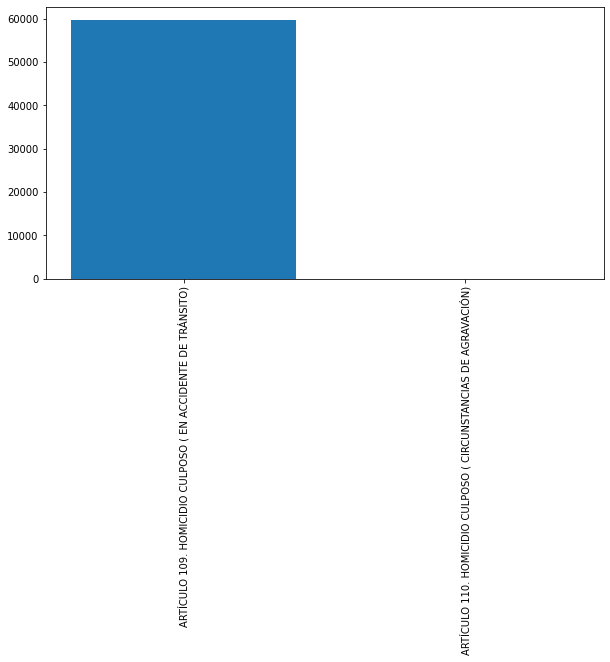

In [2034]:
fig = plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
plt.bar(detail_df['DESCRIPCIÓN CONDUCTA'],detail_df[0])
plt.show()

Se logra obsevar que la modalidad más frecuente respecto a los homicidios, son los homicidios culposos (en accidente de tránsito)

### Punto 3

A partir de alguno de los conjuntos de datos seleccionados, visualice una serie de tiempo por año y mes que permita comparar la cantidad de delitos cometidos para los departamentos con mayor ocurrencia durante los últimos 5
años. Para que los resultados entre departamentos sean comparables, es importante que normalice las cantidades obtenidas por cantidad de habitantes. En este archivo puede encontrar la población por departamento para el año 2018. Asuma que la población no ha cambiado con el paso de los años.

In [2035]:
delitos_sexuales_df_p3=delitos_sexuales_df.copy()

#### Limpieza Poblacion Colombia

In [2036]:
poblacion_colombia=pd.read_csv("https://github.com/Sebas102507/taller1_gestion_de_datos/blob/main/poblacion_colombia_2018.csv?raw=true",sep=";")

In [2037]:
poblacion_colombia.head(5)

,departamento,población
0,Amazonas,48.144
1,Antioquia,2.427.129
2,Arauca,85.585
3,Atlántico,1.206.319
4,Bolívar,973.045


In [2038]:
poblacion_colombia.dtypes

departamento    object
población       object
dtype: object

In [2039]:
poblacion_colombia["población"]=poblacion_colombia["población"].str.replace(".","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [2040]:
poblacion_colombia["población"]=poblacion_colombia["población"].astype(int)

In [2041]:
poblacion_colombia["departamento"]=poblacion_colombia["departamento"].str.upper()

#### Filtrado y Join

In [2042]:
join_df = pd.merge(delitos_sexuales_df_p3,poblacion_colombia, how="inner", left_on='DEPARTAMENTO', right_on='departamento')

In [2043]:
join_df.head(5)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,delito,departamento,población
0,CAQUETÁ,SOLANO,18756000.0,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,MENORES,ACTOS SEXUALES CON MENOR DE 14 AÑOS,CAQUETÁ,168346
1,CAQUETÁ,SAN VICENTE DEL CAGUÁN,18753000.0,CONTUNDENTES,2010-01-01,FEMENINO,ADOLESCENTES,ACCESO CARNAL VIOLENTO,CAQUETÁ,168346
2,CAQUETÁ,SAN VICENTE DEL CAGUÁN,18753000.0,SIN EMPLEO DE ARMAS,2010-01-01,FEMENINO,ADULTOS,ACTO SEXUAL VIOLENTO,CAQUETÁ,168346
3,CAQUETÁ,FLORENCIA,18001000.0,SIN EMPLEO DE ARMAS,2010-01-01,MASCULINO,MENORES,ACTOS SEXUALES CON MENOR DE 14 AÑOS,CAQUETÁ,168346
4,CAQUETÁ,PUERTO RICO,18592000.0,SIN EMPLEO DE ARMAS,2010-01-01,FEMENINO,MENORES,ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS,CAQUETÁ,168346


In [2044]:
# Últimos 5 años: 2022, 2021, 2020, 2019, 2018
last_five_years=[2022, 2021, 2020, 2019, 2018]
top_departments= join_df.loc[ (join_df["FECHA HECHO"].dt.year.isin(last_five_years)) ]

In [2045]:
top_dep=((top_departments.groupby(by=["DEPARTAMENTO"]).size().reset_index().sort_values(by=0,ascending=False)).head(10))["DEPARTAMENTO"].values

In [2046]:
top_departments["anno"],top_departments["mes"]=join_df["FECHA HECHO"].dt.year, join_df["FECHA HECHO"].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [2047]:
top_departments=top_departments[["DEPARTAMENTO","mes","anno","población"]]

In [2048]:
top_departments=top_departments.loc[top_departments["DEPARTAMENTO"].isin(top_dep)]

In [2049]:
top_departments=top_departments.groupby(by=["DEPARTAMENTO","mes","anno","población"]).size().reset_index()

In [2050]:
top_departments

,DEPARTAMENTO,mes,anno,población,0
0,ANTIOQUIA,1,2018,2427129,613
1,ANTIOQUIA,1,2019,2427129,508
2,ANTIOQUIA,1,2020,2427129,526
3,ANTIOQUIA,1,2021,2427129,307
4,ANTIOQUIA,1,2022,2427129,232
...,...,...,...,...,...
595,TOLIMA,12,2018,529635,104
596,TOLIMA,12,2019,529635,132
597,TOLIMA,12,2020,529635,78
598,TOLIMA,12,2021,529635,50


In [2051]:
top_departments=top_departments.rename(columns={0:"count"})

In [2052]:
top_departments["count/poblacion"]=top_departments["count"]/top_departments["población"]

In [2053]:
top_departments.drop(columns=["count","población"], inplace=True)

In [2054]:
top_departments.head(5)

,DEPARTAMENTO,mes,anno,count/poblacion
0,ANTIOQUIA,1,2018,0.000253
1,ANTIOQUIA,1,2019,0.000209
2,ANTIOQUIA,1,2020,0.000217
3,ANTIOQUIA,1,2021,0.000126
4,ANTIOQUIA,1,2022,0.000096


In [2055]:
top_departments.to_csv("delitos_sexuales_x_departamento_mes_anno.csv")

![picture](https://drive.google.com/uc?export=view&id=1IrXRfdmViAX1-wIfILY2LbqRHX4Yfk0b)



En caso de no se logre obsevar la imagen, se puede ver en el siguiente link:

https://drive.google.com/file/d/1IrXRfdmViAX1-wIfILY2LbqRHX4Yfk0b/view?usp=sharing

Se logra obsevar que una tendecia decreciente de delitos sexuales desde el año 2018 cada uno de los top departamentos.

Se puede obsevar que el entre los meses de Abril y Agosto se presentan picos de delitos sexuales para la mayoría de los últimos 5 años.

El departamento en el que más delitos se cometen por cantidad de habitantes es Cundinamarca.

### Punto 4

A partir de los conjuntos de datos seleccionados, construya un único dataset que integre la totalidad de los delitos ocurridos por departamento y municipio. Muestre los valores normalizados por cantidad de habitantes realizando un proceso similar al del punto anterior. En este archivo puede
encontrar proyecciones anuales de las poblaciones por departamento. Utilice la proyección para el año en curso. Considere solamente los municipios con más de 1 millón de habitantes.



In [2056]:
last_five_years=[2022, 2021, 2020, 2019, 2018]

#### Merge datos población x Departamento x Municipio

In [2057]:
poblacion_data= pd.read_csv("https://github.com/Sebas102507/taller1_gestion_de_datos/blob/main/poblacion_data.csv?raw=true",error_bad_lines=False,sep=";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [2058]:
poblacion_data["Total"]=poblacion_data["Total"].str.replace(".","")
poblacion_data["Total"]=poblacion_data["Total"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [2059]:
poblacion_data=poblacion_data.loc[ (poblacion_data["ÁREA GEOGRÁFICA"]=="Total")]

In [2060]:
poblacion_data.drop(columns=["DP","DPMP","ÁREA GEOGRÁFICA"], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [2061]:
poblacion_data["DPNOM"],poblacion_data["MPIO"]=poblacion_data["DPNOM"].str.upper(),poblacion_data["MPIO"].str.upper()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [2062]:
poblacion_data=poblacion_data.loc[(poblacion_data["Total"]>=1000000)]

In [2063]:
poblacion_data=poblacion_data.rename(columns={"DPNOM":"DEPARTAMENTO","MPIO":"MUNICIPIO","AÑO":"anno"})

In [2064]:
poblacion_data= poblacion_data.loc[ (poblacion_data["anno"].isin(last_five_years))]

In [2065]:
poblacion_data.shape

(24, 4)

In [2066]:
poblacion_data["DEPARTAMENTO"]=poblacion_data["DEPARTAMENTO"].replace({"BOGOTÁ, D.C.":"CUNDINAMARCA","VALLE DEL CAUCA":"VALLE"})

In [2067]:
poblacion_data["MUNICIPIO"]=poblacion_data["MUNICIPIO"].replace({"CARTAGENA DE INDIAS":"CARTAGENA","BOGOTÁ, D.C.":"BOGOTÁ D.C."})

In [2068]:
main_df=poblacion_data.copy()

In [2069]:
main_df.sort_values(by="Total",ascending=False)

,DEPARTAMENTO,MUNICIPIO,anno,Total
8006,CUNDINAMARCA,BOGOTÁ D.C.,2022,7901653
8003,CUNDINAMARCA,BOGOTÁ D.C.,2021,7834167
8000,CUNDINAMARCA,BOGOTÁ D.C.,2020,7743955
7997,CUNDINAMARCA,BOGOTÁ D.C.,2019,7592871
7994,CUNDINAMARCA,BOGOTÁ D.C.,2018,7412566
14,ANTIOQUIA,MEDELLÍN,2022,2612958
11,ANTIOQUIA,MEDELLÍN,2021,2573220
8,ANTIOQUIA,MEDELLÍN,2020,2533424
5,ANTIOQUIA,MEDELLÍN,2019,2483545
2,ANTIOQUIA,MEDELLÍN,2018,2427129


#### Merge con Delitos Sexuales

In [2070]:
delitos_sexuales_group=delitos_sexuales_df.copy()

In [2071]:
delitos_sexuales_group= delitos_sexuales_group.loc[ (delitos_sexuales_group["FECHA HECHO"].dt.year.isin(last_five_years))]
delitos_sexuales_group["anno"]=delitos_sexuales_group["FECHA HECHO"].dt.year
delitos_sexuales_group=delitos_sexuales_group[["DEPARTAMENTO","MUNICIPIO","anno"]]
delitos_sexuales_group=delitos_sexuales_group.groupby(by=["DEPARTAMENTO","MUNICIPIO","anno"]).size().reset_index()

In [2072]:
delitos_sexuales_group=delitos_sexuales_group.rename(columns={0:"cant.DelitosSexuales"})

In [2073]:
main_df=pd.merge(main_df,delitos_sexuales_group, how="left", left_on=['DEPARTAMENTO','MUNICIPIO',"anno"], right_on=['DEPARTAMENTO','MUNICIPIO',"anno"])

In [2074]:
main_df.shape

(24, 5)

#### Merge con Delitos Violencia Intrafamiliar

In [2075]:
intrafamiliar_group=violencia_intrafamiliar_df.copy()

In [2076]:
intrafamiliar_group= intrafamiliar_group.loc[ (intrafamiliar_group["FECHA HECHO"].dt.year.isin(last_five_years))]
intrafamiliar_group["anno"]=intrafamiliar_group["FECHA HECHO"].dt.year
intrafamiliar_group=intrafamiliar_group[["DEPARTAMENTO","MUNICIPIO","anno"]]
intrafamiliar_group=intrafamiliar_group.groupby(by=["DEPARTAMENTO","MUNICIPIO","anno"]).size().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [2077]:
intrafamiliar_group=intrafamiliar_group.rename(columns={0:"cant.DelitosViolenciaIntrafamiliar"})

In [2078]:
main_df=pd.merge(main_df,intrafamiliar_group, how="left", left_on=['DEPARTAMENTO','MUNICIPIO',"anno"], right_on=['DEPARTAMENTO','MUNICIPIO',"anno"])

#### Merge con Delitos de Secuestro

In [2079]:
secuestro_group=secuestro_df.copy()

In [2080]:
secuestro_group= secuestro_group.loc[ (secuestro_group["FECHA HECHO"].dt.year.isin(last_five_years))]
secuestro_group["anno"]=secuestro_group["FECHA HECHO"].dt.year
secuestro_group=secuestro_group[["DEPARTAMENTO","MUNICIPIO","anno"]]
secuestro_group=secuestro_group.groupby(by=["DEPARTAMENTO","MUNICIPIO","anno"]).size().reset_index()

In [2081]:
secuestro_group=secuestro_group.rename(columns={0:"cant.DelitosSecuestro"})

In [2082]:
main_df=pd.merge(main_df,secuestro_group, how="left", left_on=['DEPARTAMENTO','MUNICIPIO',"anno"], right_on=['DEPARTAMENTO','MUNICIPIO',"anno"])

#### Merge con Delitos de Homicidio

In [2083]:
homicidios_group=homicidios_df.copy()

In [2084]:
homicidios_group= homicidios_group.loc[ (homicidios_group["FECHA HECHO"].dt.year.isin(last_five_years))]
homicidios_group["anno"]=homicidios_group["FECHA HECHO"].dt.year
homicidios_group=homicidios_group[["DEPARTAMENTO","MUNICIPIO","anno"]]
homicidios_group=homicidios_group.groupby(by=["DEPARTAMENTO","MUNICIPIO","anno"]).size().reset_index()

In [2085]:
homicidios_group=homicidios_group.rename(columns={0:"cant.Homicidios"})

In [2086]:
main_df=pd.merge(main_df,homicidios_group, how="left", left_on=['DEPARTAMENTO','MUNICIPIO',"anno"], right_on=['DEPARTAMENTO','MUNICIPIO',"anno"])

#### Filtrado

In [2087]:
main_df=main_df.fillna(0)

In [2088]:
main_df

,DEPARTAMENTO,MUNICIPIO,anno,Total,cant.DelitosSexuales,cant.DelitosViolenciaIntrafamiliar,cant.DelitosSecuestro,cant.Homicidios
0,ANTIOQUIA,MEDELLÍN,2018,2427129,2173,1781,4.0,197
1,ANTIOQUIA,MEDELLÍN,2019,2483545,2456,2261,3.0,206
2,ANTIOQUIA,MEDELLÍN,2020,2533424,2155,9284,15.0,156
3,ANTIOQUIA,MEDELLÍN,2021,2573220,1808,1921,8.0,291
4,ANTIOQUIA,MEDELLÍN,2022,2612958,501,555,2.0,96
5,ATLÁNTICO,BARRANQUILLA,2018,1206319,887,833,1.0,86
6,ATLÁNTICO,BARRANQUILLA,2019,1243056,1068,1000,2.0,71
7,ATLÁNTICO,BARRANQUILLA,2020,1274250,653,1552,2.0,87
8,ATLÁNTICO,BARRANQUILLA,2021,1297082,523,907,5.0,87
9,ATLÁNTICO,BARRANQUILLA,2022,1312473,140,337,1.0,38


In [2089]:
main_df_normalize=main_df.copy()

In [2090]:
main_df_normalize["cant.DelitosSexuales Normalizado"]=main_df_normalize["cant.DelitosSexuales"]/main_df_normalize["Total"]
main_df_normalize["cant.DelitosViolenciaIntrafamiliar Normalizado"]=main_df_normalize["cant.DelitosViolenciaIntrafamiliar"]/main_df_normalize["Total"]
main_df_normalize["cant.DelitosSecuestro Normalizado"]=main_df_normalize["cant.DelitosSecuestro"]/main_df_normalize["Total"]
main_df_normalize["cant.Homicidios Normalizado"]=main_df_normalize["cant.Homicidios"]/main_df_normalize["Total"]
main_df_normalize.drop(columns=["cant.DelitosSexuales","cant.DelitosViolenciaIntrafamiliar","cant.DelitosSecuestro","cant.Homicidios"],inplace=True)

In [2091]:
porcentaje_df=main_df_normalize.copy()

In [2092]:
porcentaje_df["cant.DelitosSexuales %"]=porcentaje_df["cant.DelitosSexuales Normalizado"]*100
porcentaje_df["cant.DelitosViolenciaIntrafamiliar %"]=porcentaje_df["cant.DelitosViolenciaIntrafamiliar Normalizado"]*100
porcentaje_df["cant.DelitosSecuestro %"]=porcentaje_df["cant.DelitosSecuestro Normalizado"]*100
porcentaje_df["cant.Homicidios %"]=porcentaje_df["cant.Homicidios Normalizado"]*100
porcentaje_df.drop(columns=["cant.DelitosSexuales Normalizado","cant.DelitosViolenciaIntrafamiliar Normalizado","cant.DelitosSecuestro Normalizado","cant.Homicidios Normalizado"],inplace=True)

#### Visualización

In [2093]:
main_df.shape

(24, 8)

##### Normalizado

In [2094]:
main_df_normalize

,DEPARTAMENTO,MUNICIPIO,anno,Total,cant.DelitosSexuales Normalizado,cant.DelitosViolenciaIntrafamiliar Normalizado,cant.DelitosSecuestro Normalizado,cant.Homicidios Normalizado
0,ANTIOQUIA,MEDELLÍN,2018,2427129,0.000895,0.000734,1.648038e-06,0.000081
1,ANTIOQUIA,MEDELLÍN,2019,2483545,0.000989,0.000910,1.207951e-06,0.000083
2,ANTIOQUIA,MEDELLÍN,2020,2533424,0.000851,0.003665,5.920841e-06,0.000062
3,ANTIOQUIA,MEDELLÍN,2021,2573220,0.000703,0.000747,3.108945e-06,0.000113
4,ANTIOQUIA,MEDELLÍN,2022,2612958,0.000192,0.000212,7.654161e-07,0.000037
5,ATLÁNTICO,BARRANQUILLA,2018,1206319,0.000735,0.000691,8.289681e-07,0.000071
6,ATLÁNTICO,BARRANQUILLA,2019,1243056,0.000859,0.000804,1.608938e-06,0.000057
7,ATLÁNTICO,BARRANQUILLA,2020,1274250,0.000512,0.001218,1.569551e-06,0.000068
8,ATLÁNTICO,BARRANQUILLA,2021,1297082,0.000403,0.000699,3.854806e-06,0.000067
9,ATLÁNTICO,BARRANQUILLA,2022,1312473,0.000107,0.000257,7.619204e-07,0.000029


##### Porcentaje

In [2095]:
porcentaje_df

,DEPARTAMENTO,MUNICIPIO,anno,Total,cant.DelitosSexuales %,cant.DelitosViolenciaIntrafamiliar %,cant.DelitosSecuestro %,cant.Homicidios %
0,ANTIOQUIA,MEDELLÍN,2018,2427129,0.089530,0.073379,0.000165,0.008117
1,ANTIOQUIA,MEDELLÍN,2019,2483545,0.098891,0.091039,0.000121,0.008295
2,ANTIOQUIA,MEDELLÍN,2020,2533424,0.085063,0.366461,0.000592,0.006158
3,ANTIOQUIA,MEDELLÍN,2021,2573220,0.070262,0.074654,0.000311,0.011309
4,ANTIOQUIA,MEDELLÍN,2022,2612958,0.019174,0.021240,0.000077,0.003674
5,ATLÁNTICO,BARRANQUILLA,2018,1206319,0.073529,0.069053,0.000083,0.007129
6,ATLÁNTICO,BARRANQUILLA,2019,1243056,0.085917,0.080447,0.000161,0.005712
7,ATLÁNTICO,BARRANQUILLA,2020,1274250,0.051246,0.121797,0.000157,0.006828
8,ATLÁNTICO,BARRANQUILLA,2021,1297082,0.040321,0.069926,0.000385,0.006707
9,ATLÁNTICO,BARRANQUILLA,2022,1312473,0.010667,0.025677,0.000076,0.002895


##### Totales

In [2096]:
main_df

,DEPARTAMENTO,MUNICIPIO,anno,Total,cant.DelitosSexuales,cant.DelitosViolenciaIntrafamiliar,cant.DelitosSecuestro,cant.Homicidios
0,ANTIOQUIA,MEDELLÍN,2018,2427129,2173,1781,4.0,197
1,ANTIOQUIA,MEDELLÍN,2019,2483545,2456,2261,3.0,206
2,ANTIOQUIA,MEDELLÍN,2020,2533424,2155,9284,15.0,156
3,ANTIOQUIA,MEDELLÍN,2021,2573220,1808,1921,8.0,291
4,ANTIOQUIA,MEDELLÍN,2022,2612958,501,555,2.0,96
5,ATLÁNTICO,BARRANQUILLA,2018,1206319,887,833,1.0,86
6,ATLÁNTICO,BARRANQUILLA,2019,1243056,1068,1000,2.0,71
7,ATLÁNTICO,BARRANQUILLA,2020,1274250,653,1552,2.0,87
8,ATLÁNTICO,BARRANQUILLA,2021,1297082,523,907,5.0,87
9,ATLÁNTICO,BARRANQUILLA,2022,1312473,140,337,1.0,38


### Conclusiones

- Se logró observar que en regiones como Cartagena y Medellín se presentaron altas tasas de delitos asociadas al delitos sexuales y violencia intrafamiliar, secuestro y homicidio.

- Se recomienda prestar antención al mes de Enero ya que es donde se cometen más delitos de los mencionados anteriormente.

- Boyacá es el departamento con mayor cantidad de delitos sexuales x cantidad de habitantes.

- Es envidente que el género femenino es el más afectado para tipos de delitos asociados a los delitos sexuales y violencia intrafamiliar, aunque el género masculino presenta altas tasas de homicidios.

- Aunque la cantidad de los distintos tipos tuvo un tendencia crenciente hasta el 2020, se reconoce que desde el 2021 se han presentado fuertes caídas en dichos delitos.


- Resulta importante trabajar de la mano de las alcandías con el fin de que se lleven a cabo campañas que reduscan las estadísticas presentadas en este notebook.